> May 03, 2024 | {sub-ref}`wordcount-minutes` min read




# 6. Optimizadores

Tal y como se menciona en el notebook de {ref}`sec_QML_Introduccion`, el aprendizaje automático tinene como objetivo aprender de las observaciones existentes y hacer uso de ese aprendizaje para predecir nuevas observaciones o determinar el resultado de nuevas entradas. Para ello, es necesario un proceso iterativo en el que se busca minimizar el error cometido, este proceso se conoce como el entrenamiento del modelo {cite}`bib_conceptosMLopti`.

En objetivo del entrenamiento es lograr el menor error posible, para ello se evalua la función de coste conociendo así la calidad de las predicciones del modelo, en otras palabras conoceremos como de buena es una solución. El proceso irá avanzando, mejorando la precisión en la predicción, hasta cumplir con el criterio de parada fijado. La tarea de minimizar las funciones de coste no es sencilla y existen diversas técnicas para abordarla, algunas de ellas se muestran a continuación.

(sec_DescensoGradiente)= 
## 6.1. Descenso por gradiente

El descenso por gradiente (*gradient descent*) es un algoritmo de optimización utilizado para realizar el entrenamiento de modelos de *Machine Learning* y *Deep learning* que se basa en el concepto del gradiente para llevar a cabo la minimización del error cometido {cite}`bib_gradIBM`. Cabe destacar que para poder encontrar el mínimo de la función este método asume que se puede obtener el gradiente de la función a estudiar y que esta es contínua y diferenciable (no necesariamente en toda la función).

Para poder implementar este algoritmo de optimización se debe definir la dirección y la **tasa de aprendizaje** (también conocido como el tamaño del paso). El primero de ellos nos indica en qué dirección seguir explorando el conjunto de soluciones mientras que el segundo especifica cuanto avanzar en la dirección seleccionada {cite}`bib_gradIntro`. 

El algoritmo parte desde un punto arbitrario $x^{(0)}$ en el que se debe conocer el valor inicial de la función objetivo a minimizar. En cada paso $k \geq 0$ se avanza de forma iterativa en la dirección opuesta al gradiente, ya que se trabaja con problemas a minimizar. Cabe destacar que esto no supone un límite a la hora de definir la cantidad de problemas que se pueden resolver con esta técnica, ya que todos los problemas a maximizar se pueden transformar en problemas a minimizar mediante un cambio de signo. La busqueda de la solución utilizando el descenso por gradiente se puede resumir mediante la siguiente expresión matemática.

$$ x^{(k+1)} = x^{(k)} - t_k \nabla f(x^{(k)})$$

Donde $x^{(k+1)}$ corresponde al nuevo punto, $x^{(k)}$ representa el punto actual en el que se encuentra el algoritmo, $t_k$ hace referencia al tamaño del paso (también se utiliza $\alpha$ para representar este parámetos) y $\nabla f(x^{(k)})$ corresponde al gradiente en el punto actual. 

Tal y como se aprecia en la expresión anterior, para encontrar el nuevo punto el algoritmo se avanza en el sentido opuesto al gradiente, esto se indica mediante el signo negativo.

A continuación, se adjunta el pseudo-código del descenso por gradiente.

::::{figure} imagenes/pseudo_GD.PNG
:name: "fig_pseudo_GD"
:width: 300px
:align: center
Pseudo-código del descenso por gradiente.
::::


::::::{admonition} Nota
:class: note



La <b>tasa de aprendizaje</b> también conocida como tamaño del paso, suele tomar un valor pequeño. Existen algunas variantes del algoritmo en las que se evalúa y se actualiza en función del comportamiento de la función de coste. Mediante estas estrategias se busca explorar el espacio de soluciones en las primeras iteraciones y explotar las buenas soluciones conforme avanzan las iteraciones [3].

    
Una tasa de aprendizaje alta conlleva pasos más grandes, por lo que puede que el algoritmo encuentre la solución antes, pero se corre el riesgo de sobrepasar el minimo y que el algoritmo no converja a una solución. El descenso del gradiente con una tasa baja, sin embargo, avanza muy despacio y necesita muchas iteraciones para encontrar una buena solución, resultando así un proceso muy costoso.  
    

::::::


(sec_DGproblemas)= 
### 6.1.1. Problemas del descenso por gradiente

El algoritmo de descenso por gradiente se basa en que la **función de coste es convexa**, cuando esta condición se cumple el algoritmo de descenso por gradiente encuentra con facilidad el mínimo global. En problemas no convexos sin embargo, este algoritmo puede encontrarse con dificultades para llegar hasta el minimo global y quedarse atrapado en minimos locales.

Es importante recordar que cuando la pendiente de la función de coste (el gradiente de la función) es cercana a cero el modelo deja de aprender, dejando al algoritmo atrapado en dichos puntos. Cabe destacar que esta situación se puede producir también en puntos silla (también llamados puntos de inflexión) y mínimos locales, por lo que en estos casos hacer uso del descenso por gradiente no asegura el obtener la solución óptima al problema. 
    
::::{figure} imagenes/punto_inflexion.png
:name: "fig_pinflex"
:width: 350px
:align: center
Ejemplo de máximo, mínimo y punto silla de una función.
::::

Se detectan otras dos dificultades al utilizar el descenso por gradiente para ajustar los parámetros de las redes neuronales.

- **Desvanecimiento del gradiente** (gradientes fuga), esto ocurre cuando el gradiente es demasiado pequeño en la retropropagación en las redes neuronales. El gradiente se reduce lo que provoca que las capas intermedias de la red aprendan muy lentamente, cuando esto sucede los parámetros se actualizan hasta que toman el valor nulo. Cuando esto ocurre el algoritmo que se esta entrenando deja de aprender. {cite}`bib_gradIBM`

- El problema de **gradientes explosivos** es justamente el efecto opuesto al anterior, es decir, cuando el gradiente es demasiado grande. En estos casos se crea un modelo inestable, los pesos de la red neuronal crecen demasiado hasta que pasan a tomar el valor NaN. {cite}`bib_gradIBM`



(sec_DGimplementacion)= 
### 6.1.2 Implementación

A continuación se implementa un ejemplo con el dataset two moons para visualizar el funcionamiento de este algoritmo de optimización. Este conjunto de datos cuenta con dos carácteristicas y las instancias se dividen en dos clases, por lo tanto el objetivo es clasificar dichas clases cometiendo el menor error posible. No obstante, cabe destacar que la frontera de decisión no es lineal, lo que supone una dificultad añadida en el aprendizaje.

Más adelante se muestra gráficamente el dataset de manera que se clarifica el problema a abordar.

Para poder trabajar con el ejemplo planteado, primero se ha generado un entorno que contiene el software *Qibo* en la versión 0.1.12 y *tensorflow* en la versión 2.10.0.

In [1]:
# Importar las librerías necesarias

import numpy as np
import qibo
import matplotlib.pyplot as plt
from qibo import callbacks, gates, hamiltonians, models
from qibo.symbols import X, Y, Z, I
from sklearn.datasets import make_moons
from qibo.models import Circuit

# Se desactiva los mensajes de tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf

# Fijar el backend en el que se ejecutará el programa
qibo.set_backend("tensorflow")

In [4]:
# Definir variables necesarias para la ejecución del algoritmo:

nclasses=2
measured_qubits= int(np.ceil(np.log2(nclasses)))
nqubits=2
nlayers=3
nshots=10000

En la función **procesdata** se estandarizan los datos de entrada mediante la normalización min-max y se genera un nuevo conjunto de datos que almacenan dichos valores.

In [5]:
def procesdata(data): 
    data=np.array(data)
    Min=data.min(axis=0)
    Max=data.max(axis=0)
    data=(2*data-Max-Min)/(Max-Min)
    one=np.ones((len(data),2))
    data_p=np.c_[data,data]
    return data_p

En la siguiente celda se carga el conjunto de datos que se utilizará en este notebook para testear el funcionamiento de distintas técnicas de optimización. Tras ejecutar dicha celda obtendremos la **representación gráfica del dataset** two moons.

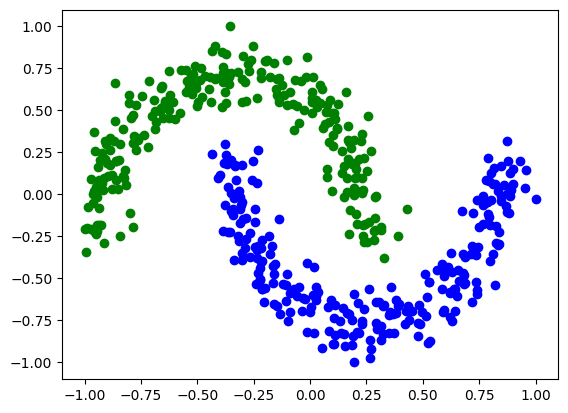

In [6]:
num_inputs = 2
num_samples = 500
X,y=make_moons(num_samples,noise=0.1)

y01 = 1 * (np.sum(X, axis=1) >= 0) # in { 0,  1}
y_one_hot = np.zeros((num_samples, 2))

for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1
X_pad=procesdata(X)

for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")

plt.show()

Tal y como ya se ha comentado en notebooks anteriores, para poder entrenar el modelo dividiremos el dataset inicial en el conjunto de entremaniento (*train*) y en el que nos servirá para conocer el comportamiento del circuito con datos desconocidos (*val*).

In [7]:
Y = 2*y -np.ones(len(y))

num_data = len(Y)
num_train = int(0.80 * num_data)

index = np.random.permutation(range(num_data))

Y_train = Y[index[:num_train]]
Y_val = Y[index[num_train:]]
X_train = X_pad[index[:num_train]]
X_val = X_pad[index[num_train:]]

El circuito que se va a utilizar en este notebook está detallado en la siguiente función. Se pueden distinguir dos fases:

**1. Encoding:**
El encoding está definido por una rotación en el eje Y y otra rotación en el eje Z. Como se puede apreciar en el código, para poder codificar los datos con los que estamos trabajando se deben introducir como ángulos de rotación en las puertas iniciales. Este método de codificación se explica más detalladamente en el notebook {ref}`sec_QML_FeatureEncoding`.
 
**2. Circuito variacional:**
Como se aprecia en la funicón *create_circuit* el circuito variacional cuenta con tres capas, cada una de ellas se compone con dos rotaciones en el eje Y y una CNOT necesario para entrelazar los dos qubits, y una última rotación en el eje Y antes de realizar la medida. 

In [8]:
def create_circuit(w,x, nqubits= 2):
    
    c= Circuit(nqubits=nqubits)
    
    # ENCODING:

    c.add(gates.RY(q=0, theta = w[0]*x[0]+w[4]))
    c.add(gates.RY(q=1, theta = w[1]*x[1]+w[5]))
    
    c.add(gates.RZ(q=0, theta = w[2]*x[2]+w[6]))
    c.add(gates.RZ(q=1, theta = w[3]*x[3]+w[7]))
    
    # CIRCUITO VARIACIONAL:
    
    # LAYER 1
    c.add(gates.RY(q=0, theta = w[4]))
    c.add(gates.RY(q=1, theta = w[5]))
     
    c.add(gates.CZ(0,1))
    
    c.add(gates.RY(q=0, theta = w[6]))
    c.add(gates.RY(q=1, theta = w[7]))
    
    # LAYER 2
    c.add(gates.RY(q=0, theta = w[8]))
    c.add(gates.RY(q=1, theta = w[9]))
    
    c.add(gates.CZ(0,1))
    
    c.add(gates.RY(q=0, theta = w[10]))
    c.add(gates.RY(q=1, theta = w[11]))
    
    # LAYER 3
    c.add(gates.RY(q=0, theta = w[12]))
    c.add(gates.RY(q=1, theta = w[13]))

    c.add(gates.CZ(0,1))
    
    c.add(gates.RY(q=0, theta = w[14]))
    c.add(gates.RY(q=1, theta = w[15]))
    
    # ÚLTIMA ROTACIÓN EN Y:
    c.add(gates.RY(q=0, theta = w[16]))
    c.add(gates.RY(q=1, theta = w[17]))
    
    # MEDIMOS EL QUBIT 0:
    c.add(gates.M(0))
    
    return c

La siguente función calcula el rendimiento del modelo, para ello se utilizan dos métricas:

::::::{card} 
<b>Definición</b>: </i>Error cuadrático medio</i> 

^^^

Mide el promedio del error al cuadrado, donde el error se considera la diferencia entre la predicción que realiza el modelo y la etiqueta almacenada en el dataset. La formula con la que se calcula este valor es la siguiente:
 
$$
MSE = \frac{1}{N} \sum_{i=1}^N (y_i-\hat y_i)^2
$$

::::::


::::::{card} 
<b>Definición</b>: </i>Accuracy</i> 

^^^

Se trata de una métrica que muestra fracción de ejemplos que se han clasificado correctamente, es decir, que el modelo ha predicho la clase a la que pertenece.
 
$$
\text{Accuracy} = \frac{\text{Number of correct pedictions}}{\text{Total number of predictions}}
$$

::::::


In [9]:
def sqloss_acc(labels, predictions):
    sqloss = 0
    acc = 0
    # Recorremos todas las instancias comparando el label conocido con la predicción que ha realizado el modelo.
    for label, prediction in zip(labels, predictions):
        
        # Modificamos el valor de loss
        sqloss = sqloss + (label - prediction)**2
        
        #Vemos si el label y la predicción coincide para calcular el accuracy
        if np.sign(label)==np.sign(prediction):
            acc += 1
    # dividir entre la cantidad de datos de entrada para obtener un valor entre 0 y 1.
    sqloss = sqloss / len(labels)
    acc = acc / len(labels)
    
    print('Loss: ', sqloss.numpy(), 'Acc: ', acc)
    return sqloss, acc

In [10]:
#  En esta función se llama a la función de crear el circuito con los parámetros necesarios.
def Classifier_circuit(theta,data,nqubits=2):
    circ = create_circuit(theta,data, nqubits)
    return circ

La función **hamiltonian** varía en función del número de qubits con los que se este trabajando, en este caso nos interesa realizar una medición Z en el qubit 0 por lo que realizamos el producto Z en el qubit 0 y la identidad para el resto de qubits. Haremos uso de está función para calcular el valor esperado del circuito y nos facilitará el cálculo del gradiente que necesitaremos más adelante.

In [11]:
# Definir el observable:
def hamiltonian():
    Obj = np.prod([ Z(0), I(1)])
    h = hamiltonians.SymbolicHamiltonian(Obj)
    return h

La función **Predictions** es la encargada de ejecutar el circuito y obtener el valor esperado. Tiene como parámetros de entrada el número de qubits, el número de shots, los pesos (son los parámetros que deseamos optimizar y corresponden a las rotaciones de las puertas del circuito) y una instancia x del dataset (unicamente las variables de entrada, excluimos el valor de la etiqueta).

In [12]:
def Predictions(data, theta, nqubits, nshots=10000):

    c = Classifier_circuit(theta,data,nqubits)
    h = hamiltonian()
    expected_value = h.expectation(c.execute().state())
    
    return expected_value

En la función de coste realizamos las predicciones para los datos de entrada y calculamos el rendimiento del modelo.

In [13]:
def Cost_function(theta, data, Y, nqubits, nshots=10000):
    predictions = [Predictions(x, theta,nqubits) for x in data]
    return sqloss_acc(Y, predictions)[0]

En la siguiente celda se lleva a cabo todo el proceso:
1. Definir el número de qubits necesarios, número de iteraciones a realizar y el *batch size*.
2. Inicializar los ángulos de rotación (parámetros a optimizar).
3. Iterar para optimizar los parámetros correspondientes a las rotaciones de las puertas. Para ello se calcula el gradiente y se calculan los nuevos valores de los angulos de rotación.

```{code-block} python
from time import time

start_time = time()

# Definición de algunos parámetros
nqubits = 2
n_iter = 60

learning_rate = 0.25
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)

for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)
 
   
   # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits)

    tf_grads = tape.gradient(value_cost, [params])
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "SGD")(learning_rate=learning_rate)
    optimizer.apply_gradients(zip(tf_grads, [params]))

        
tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

print(params)
```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [14]:
params_SGD = [-0.94029041,  1.76279408,  0.07174585, -0.08851703,  0.59543365,
       -0.61919009,  0.16678696, -0.11759714,  0.40629924, -0.21482006,
        0.15629836, -0.10974645,  0.16246831, -0.12307243,  0.23741627,
        0.00333674,  0.24791843, -0.00205158]

Una vez entrenado el modelo, se utilizan los parámetros ajustados para conocer las predicciones y conocer el error y tasa de acierto que se ha logrado. A continuación se calcula el error al realizar las predicciones del conjunto val y por otro lado el comentido con todas las instancias.

In [15]:
# Calcular coste con todos los datos
cost_val = Cost_function(params_SGD, X_val, Y_val,nqubits)
cost_all = Cost_function(params_SGD, X_pad, Y,nqubits)

Loss:  0.34514143932308 Acc:  0.89
Loss:  0.3666901528575595 Acc:  0.884


En la siguiente imagen se puede comparar la clasificación obtenida mediante el modelo entrenado y las etiquetas reales que presentaban los datos en el dataset.

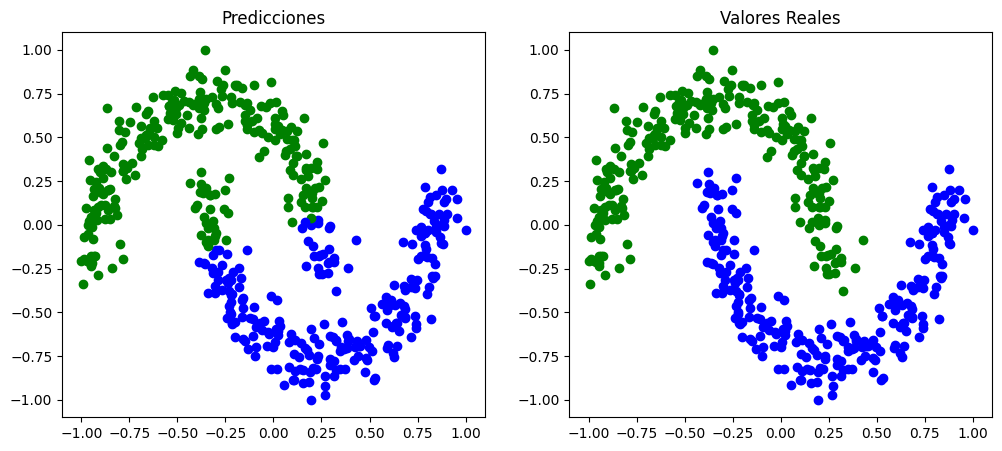

In [17]:
predictions = [Predictions(x, params_SGD,nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


Tal y como se aprecia en la imagen anterior, el modelo no llega a aprender correctamente. El clasificador que obtenemos no consigue generar la frontera de decisión no lineal que se comentaba anteriormente. Todos los errores se comenten en la zona central (la que genera la dificultad), es por eso que el valor del error no es demasiado alto ni el del accuracy excesivamente bajo.

(sec_momentum)= 
## 6.2. Momentum

Como se ha comentado en apartados anteriores, el algoritmo de descenso por gradiente puede encontrarse con ciertas dificultades que empeoren considerablemente su funcionamiento. Esto principalmente se debe a que el resultado obtenido tiene una gran dependencia de la tasa de aprendizaje y del gradiente del paso actual, por lo que al no tener en cuenta la trayectoria de soluciones exploradas se puede quedar atrapado en puntos que aparentan ser una buena solución (por ejemplo mínimos locales y puntos silla). Para intentar solventar este tipo de dificultades se implementa el concepto de Momentum.

(sec_momentumAlgoritmo)= 
### 6.2.1. Algoritmo

Este algoritmo es una extensión de la técnica anterior, por lo que la estrategía a seguir es muy similar, la variación que sufre esta técnica es que en la exploración de soluciones se tiene en cuenta las soluciones ya exploradas. Para integrar la inercia se puede hacer uso del concepto estadístico de media móvil sobre los gradientes pasados. En las regiones donde la pendiente es alta, las actualizaciones serán significativas, de manera que en cierto modo, se gana impulso al tomar una media móvil sobre estos gradientes. 

Utilizando esta técnica se consigue introducir la inercia. Sin embargo, utilizando este concepto estadístico todos los gradientes tienen la misma ponderación, en otras palabras, se les otorga la misma importancia a todos los gradientes independientemente de la lejanía del momento actual. Es por esto que se utiliza un promedio ponderado, de manera que los gradientes más recientes tengan mayor influencia.

El algoritmo no sufre variaciones drásticas, unicamente se debe tener en cuenta la variación a la hora de calcular el gradiente. En el descenso por gradiente con momentum el valor del siguiente punto se calcula mediante la siguiente expresión:

$$ x^{(k+1)} = x^{(k)} - a^{(k+1)}$$

donde el término $a^{(k+1)}$ se actualiza mediante la siguiente expresión $ a^{(k+1)} = \beta a^{(k)} + t_k \nabla f(x^{(k)})$ donde $t_k$ corresponde al tamaño de paso y $\beta$ corresponde al momentum, este parámetro debe cumplir que $ \beta \in [0,1]$ {cite}`bib_MomentumOptimizer`.


(sec_momentumBeta)= 
### 6.2.2. Como seleccionar $\beta$

Al introducir el momentum se debe ajustar un nuevo parámetro, este corresponde al peso que le otorgamos a los gradientes anteriores y se denomina $\beta$. Si el valor de $\beta$ es pequeño el gradiante se reduce rápidamente pudiendo crear problemas de gradiente desvaneciente. Si se le asigna un valor demasiado grande, sin embargo, este no se reducirán tan rápido por lo que influirán más gradientes en la actualización, este segundo caso es el ideal. Cabe destacar que el valor más común para este parámetos es $0.9$. {cite}`bib_gradMomentumCoursera`

(sec_momentumImplementacion)= 
### 6.2.3. Implementación

Para apreciar las diferencias entre los métodos, desarrollaremos el mismo ejemplo con este segundo optimizador.

```{code-block} python
from time import time

start_time = time()

# Definición de algunos parámetos
nqubits = 2
n_iter = 60

learning_rate = 0.25
momentum = 0.9
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)

for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)
    

    # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits) 

    tf_grads = tape.gradient(value_cost, [params])
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "SGD")(learning_rate=learning_rate, momentum = momentum)
    optimizer.apply_gradients(zip(tf_grads, [params]))

        
tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

print(params)
```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [18]:
params_SGD_momentum = [-0.94029041,  1.76279408,  0.07174585, -0.08851703,  0.59543365,
       -0.61919009,  0.16678696, -0.11759714,  0.40629924, -0.21482006,
        0.15629836, -0.10974645,  0.16246831, -0.12307243,  0.23741627,
        0.00333674,  0.24791843, -0.00205158]

Al igual que en el caso anterior, se calcula el error y el accuracy.

In [19]:
# Calcular coste con todos los datos y mirar precisión para criterio de parada.
cost_val = Cost_function(params_SGD_momentum, X_val, Y_val,nqubits)
cost_all = Cost_function(params_SGD_momentum, X_pad, Y,nqubits)

Loss:  0.34514143932308 Acc:  0.89
Loss:  0.3666901528575595 Acc:  0.884


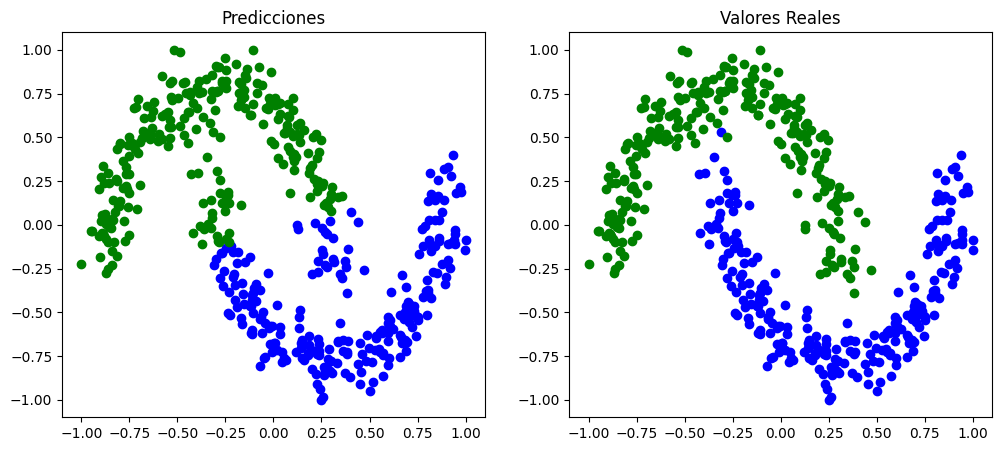

In [23]:
predictions = [Predictions(x, params_SGD_momentum,nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


El resultado obtenido en este caso es similar al anterior.

(sec_Nesterov)= 
## 6.3. Nesterov Momentum Optimizer (descenso por gradiente con Nertorv Momentum)

Al igual que los dos métodos anteriores, este algoritmo de optimización también se basa en el gradiente. No obstante, cuenta con una mayor tasa de convergencia en ciertas situaciones. {cite}`bib_Ilya2013` 

(sec_NesterovAlgortimo)= 
### 6.3.1. Algoritmo

El optimizador Nesterov Momentum es similar al descenso por gradiente con momentum, pero este desplaza el punto actual mediante el término de momentum al calcular el gradiente. De manera que la única modificación respecto a la técnica anterior es la expresión para actualizar $a^{(k+1)}$ que se sustituye por $a^{(k+1)} = \beta a^{(k)} + t_k \nabla f(x^{(k)} - \beta a^{(k)})$.{cite}`bib_NesterovMomentumOptimizer`


(sec_NesterovImplementacion)= 
### 6.3.2. Implementación

```{code-block} python
from time import time

start_time = time()


# Definición de algunos parámetros
nqubits = 2
n_iter = 60

learning_rate = 0.25
momentum = 0.9
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)

for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)
      
    # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits)

    tf_grads = tape.gradient(value_cost, [params])
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "SGD")(learning_rate=learning_rate, momentum = momentum, nesterov=True)
    optimizer.apply_gradients(zip(tf_grads, [params]))
        
tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

print(params)
```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [25]:
params_nesterov = [-1.16792912,  1.6060722 ,  0.0843576 , -0.02140028,  1.58956029,
        0.01566641,  1.48904306,  0.69655598,  0.82610582,  0.50128958,
        0.62812613, -0.04462584,  0.63429607, -0.05795183,  0.83151127,
        0.00333674,  0.84201342, -0.00205158]

In [27]:
# Calcular coste con todos los datos y mirar precisión para criterio de parada.
cost_val = Cost_function(params_nesterov, X_val, Y_val,nqubits)
cost_all = Cost_function(params_nesterov, X_pad, Y,nqubits)

Loss:  0.32258818501500053 Acc:  0.87
Loss:  0.37059166859645326 Acc:  0.872


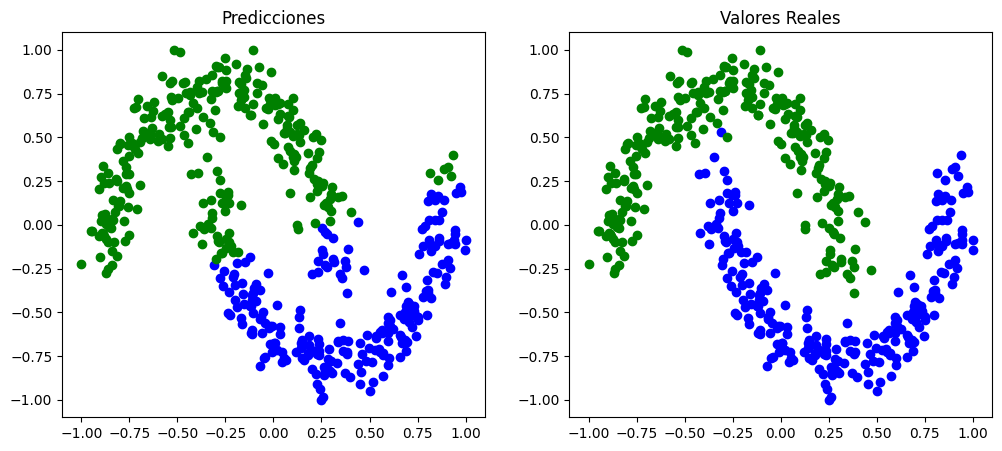

In [29]:
predictions = [Predictions(x, params_nesterov,nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label       
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


En este caso la clasificación cambia, se pueden apreciar errores de clasificación en los extremos y se mantienen los errores de clasificación en el centro.

(sec_Adam)= 
## 6.4 Adam

Se trata de un método de optimización estocástica eficiente que unicamente requiere gradientes de primer orden con poco requerimiento de memoria. Este método calcula tasas de aprendizaje adaptativas individuales para diferentes parámetros a partir de las estimaciones del primer y segundo momento de los gradientes. Es por eso que el nombre de esta técnica, Adam, proviene de *adaptative moment estimation*. {cite}`bib_adam`

(sec_AdamAlgoritmo)= 
### 6.4.1. Algoritmo

A continuación se muestra el pseudo-código de este algoritmo.

::::{figure} imagenes/AlgAdam.PNG
:name: "fig_AlgAdam"
:width: 600px
:align: center
Pseudo-código algoritmo Adam [[10]](#bib_adam).
::::


Tal y como se muestra en la figura 5, el algoritmo actualiza las medias móviles exponenciales del gradiente ($m_t$) y del gradiente al cuadrado ($v_t$) donde los hiperparámetros $\beta_1, \beta_2 \in [0,1)$ corresponden al parámetro de suavizado de las medias móviles. Como se aprecia en el pseudo-código anterior, los parámetros de suavizado se inicializan al 0, dejando que en las primeras iteraciones el valor sea cercano al valor nulo, especialmente cuando los valores de $\beta$ son cercanos a 1 {cite}`bib_adam`. 


(sec_AdamImplementacion)= 
### 6.4.2. Implementación

```{code-block} python
from time import time

start_time = time()


# Definición de algunos parámetros
nqubits = 2
n_iter = 60

learning_rate = 0.25
momentum = 0.9
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)

for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)
    
    # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits)

    tf_grads = tape.gradient(value_cost, [params])
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "Adam")(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999,epsilon=1e-08)
    optimizer.apply_gradients(zip(tf_grads, [params]))
        
tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

print(params)
```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [16]:
params_adam = [-1.48232873e+00, -2.51308046e+00,  5.62069491e-01,  2.72334117e-01,
        1.86775543e-02,  4.87684609e-01,  5.09494809e-01,  4.27517459e-01,
       -1.02794316e-03,  4.33140725e-01,  5.01443413e-01,  4.41843375e-02,
        5.07613354e-01,  3.08583526e-02,  4.43715065e-03,  3.33674327e-03,
        1.49393091e-02, -2.05158266e-03]

In [17]:
# Calcular coste con todos los datos y mirar precisión para criterio de parada.
cost_val = Cost_function(params_adam, X_val, Y_val,nqubits)
cost_all = Cost_function(params_adam, X_pad, Y,nqubits)

Loss:  0.5826879170696884 Acc:  0.77
Loss:  0.6444787929269127 Acc:  0.794


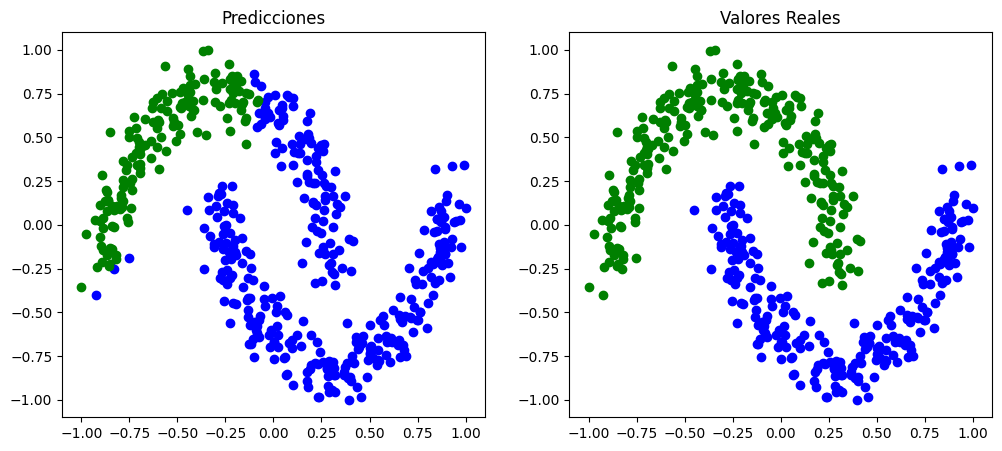

In [19]:
predictions = [Predictions(x, params_adam,nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label       
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


Tal y como se aprecia en el gráfico anterior, este optimizador no es capaz de conseguir los parámetros adecuados para una correcta clasificación. Se puede observar que todas las instancias se etiquetan con la misma clase.

(sec_Adadelta)= 
## 6.5 Adadelta

Adadelta es una técnica de optimización estocástica basada en el descenso por gradiente que permite aplicar el método de la tasa de aprendizaje por dimensión. Se trata de una expansión del método Adagrad que busca reducir la agresividad y el descenso monótono de la tasa de aprendizaje. Para ello en vez de hacer uso de todos los gradientes pasados, únicamente utilizan los contenidos en una ventana de tamaño fijo $w$ {cite}`bib_adadeltaKeras`.


(sec_AdadeltaAlgoritmo)= 
### 6.5.1. Algoritmo



La suma de los gradientes se define de manera recursiva, de manera que $E[g^2]_t$ en el tiempo t depende de la media anterior y el gradiente actual, tal y como se indíca en la siguiente formula {cite}`bib_adadelta`:
$$E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2$$

Normalmente el parámetro $\gamma$ se fija a 0.9. Utilizando este método de optimización los parámetros se acutalizan mediante las siguientes expresiones {cite}`bib_adadelta`:
$$\Delta\theta_t = -\frac{\eta}{\sqrt{E[g^2]_t+\epsilon}}g_t$$


La principal ventaja del algoritmo Adadelta es que no es necesario definir el valor de la tasa de aprendizaje por defecto {cite}`bib_adadeltaKeras`.


(sec_AdadeltaImplementacion)= 
### 6.5.2. Implementación

```{code-block} python
from time import time

start_time = time()


# Definición de algunos parámetros
nqubits = 2
n_iter = 60

learning_rate = 0.25
momentum = 0.9
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)

for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)  
   
    # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits)

#         print('LOSS en batch: ', value_cost.numpy(), 'ACC en batch: ', acc_cost)
    tf_grads = tape.gradient(value_cost, [params])
#     print ("tf_grad", tf_grads) 
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "Adadelta")(learning_rate=learning_rate)
    optimizer.apply_gradients(zip(tf_grads, [params]))
        
tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

print(params)
```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [22]:
params_adadelta = [-0.003568  ,  0.00432562,  0.01021908,  0.02240893,  0.0398887 ,
       -0.00748113,  0.03071376, -0.00137568,  0.02018069,  0.00424388,
        0.02265331,  0.01388976,  0.02882325,  0.00056377,  0.02565151,
        0.00333674,  0.03615367, -0.00205158]

In [23]:
# Calcular coste con todos los datos y mirar precisión para criterio de parada.
cost_val = Cost_function(params_adadelta, X_val, Y_val,nqubits)
cost_all = Cost_function(params_adadelta, X_pad, Y,nqubits)

Loss:  1.9023877459164489 Acc:  0.51
Loss:  1.9411755834054794 Acc:  0.5


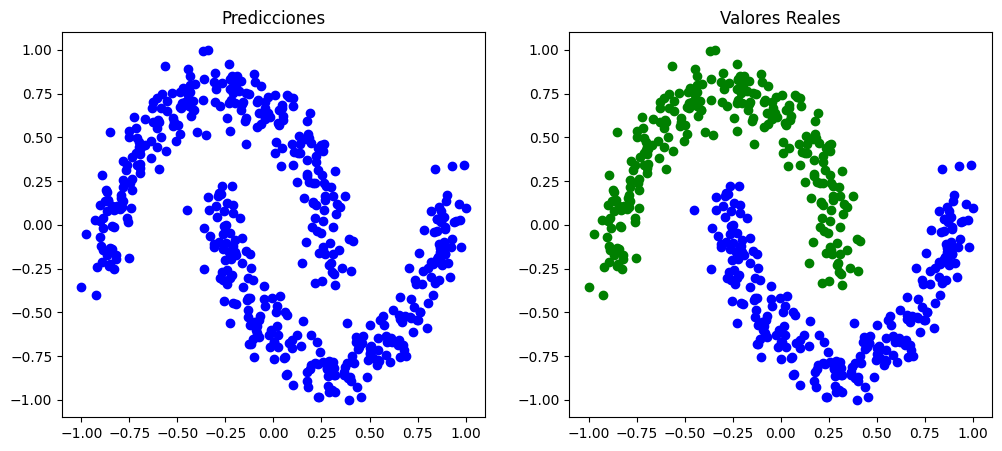

In [25]:
predictions = [Predictions(x, params_adadelta,nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label       
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


Ocurre lo mismo que en el caso anterior, el clasificador no hace distinción entre dos clases y no se genera ninguna frontera de decisión.

(sec_Powell)= 
## 6.6.  Método de optimización Powell

El algoritmo *Powell's conjugate direction method*, también conocido como método de Powell trata de encontrar un mínimo local de una función. Haciendo uso de esta técnica no es necesario que la función de coste sea diferenciable ya que no se hace uso de derivadas durante el proceso de optimización. 

Para poder utilizar este método debe ser una función de valores reales y con un número fijo de inputs. El algoritmo necesita un punto inicial y un set de vectores para iniciar el proceso. Este método minimiza la función mediante una busqueda bidireccional para cada uno de los vectores.

```{code-block} python
from time import time
from scipy.optimize import minimize

start_time = time()


# Definición de algunos parámetros
nqubits = 2

learning_rate = 0.25
momentum = 0.9
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)
result = minimize(Cost_function, test_params,args=(X_train, Y_train,nqubits), method ='Powell', options={'disp':True,'maxiter':60,'maxfev':60})
print(result.x)

tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [20]:
params_powell = [5.78141512e+00,  2.94328489e+00,  8.82134090e-04,  4.07261522e-03,
  7.84590743e-01,  1.64362966e+00,  9.50088418e-03, -1.51357208e-03,
 -1.03218852e-03,  4.10598502e-03,  1.44043571e-03,  1.45427351e-02,
  7.61037725e-03,  1.21675016e-03,  4.43863233e-03,  3.33674327e-03,
  1.49407907e-02, -2.05158264e-03]

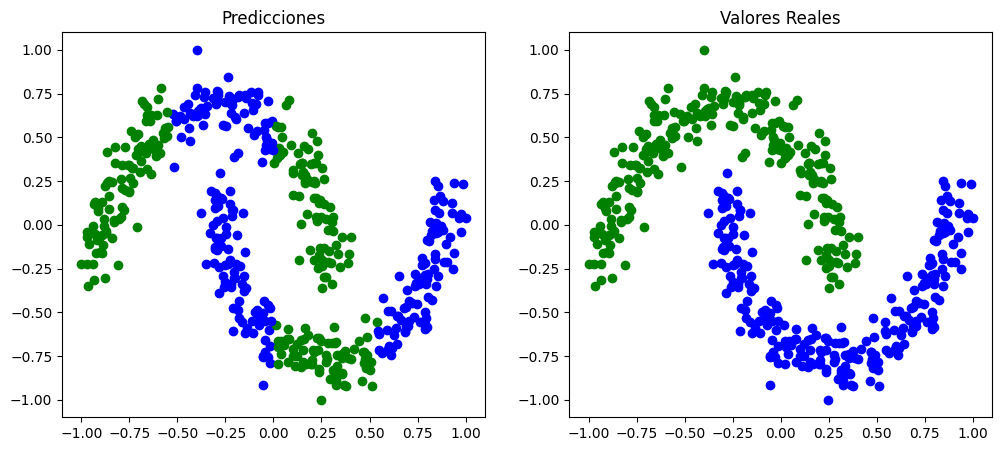

In [22]:
predictions = [Predictions(x, params_powell,nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label       
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


Con el clasificador ajustado mediante el optimizador Powell observamos una frontera de decisión que corresponde a una línea horizontal, por lo que tampoco se logra la clasificación esperada.

(sec_BFGS)= 
## 6.7. Método de optimización BFGS

El algoritmo Broyden-Fletcher-Goldfarb-Shanno también conocido como BFGS, es un método iterativo utilizado para resolver problemas no lineales sin restricciones. Al igual que el método Davidon-Fletcher-Powell, determina la dirección de descenso precondicionando el gradiente con la información de la curvatura de la función. BFGS realiza este proceso gradualmente mejorando la matriz hessiana de la función de coste. Dicha matriz se obtiene mediante evaluaciones del gradiente (o evaluaciones del gradiente aproximado) y se generaliza mediante el *método de la secante* {cite}`bib_BFGS`.


::::::{admonition} Nota (Método de la secante) 
:class: note


     
Se trata de un método utilizado para aproximar la derivada de una función, en algunos casos el cálculo de la derivada es muy costoso por lo que este tipo de métodos resultan de gran utilidad. La expresión utilizada para obtener el valor de la pendiente es la siguiente [14]:
 
     
$$
f^\prime(x_0) = \frac{f(x_1)-f(x_0)}{x_1-x_0}
$$    

::::::


```{code-block} python
from time import time
from scipy.optimize import minimize

start_time = time()


# Definición de algunos parámetros 
nqubits = 2

learning_rate = 0.25
momentum = 0.9
batch_size = 5

np.random.seed(0)

# Inicializar los ángulos de rotación
test_params = np.random.normal(0,1,18)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)
result = minimize(Cost_function, test_params,args=(X_train, Y_train,nqubits), method ='BFGS', options={'disp':True,'maxiter':30})
print(result.x)

tiempo_ej = time()-start_time
print('El tiempo necesario para ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')
```


::::::{admonition} Nota
:class: note


     
La celda anterior no se ejecuta al generar la página web debido a que el tiempo requerido es muy elevado. Los parámetros obtenidos trás el proceso de optimización se indican en la siguiente celda para poder obtener los siguientes gráficos.  

::::::


In [23]:
# Cambiar valores de los parametros

params_BFGS = [-1.13857089e+00,  2.37978594e+00, -8.19608946e-05,  7.41954923e-05,
  5.95981338e-01, -7.80111697e-01,  2.72385273e-03, -3.69266125e-02,
  6.48136305e-01, -1.34811159e-02,  1.46589166e-01,  8.38802914e-02,
  1.52760468e-01,  7.05566292e-02,  1.92534534e-01,  3.33697291e-03,
  2.03037478e-01, -2.05223045e-03]

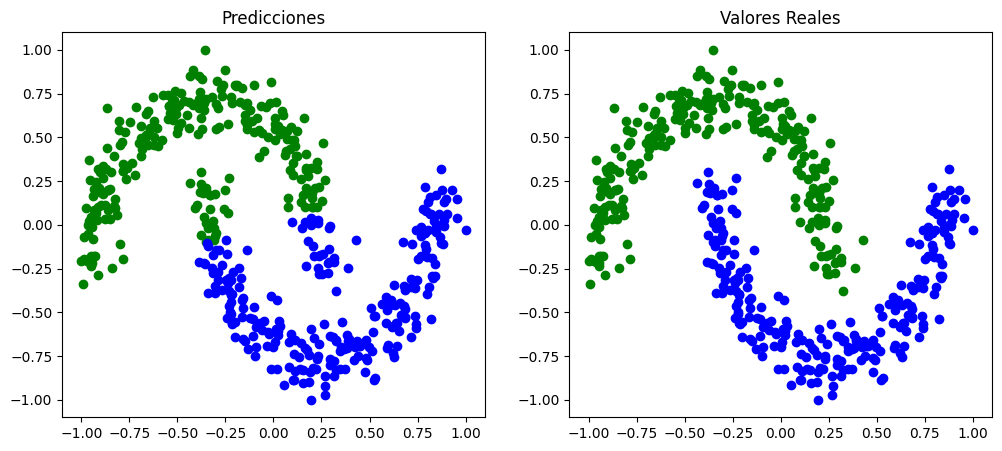

In [25]:
predictions = [Predictions(x, params_BFGS, nqubits) for x in X_pad]
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Visualizar las predicciones realizadas por el modelo
ax[0].set_title('Predicciones')
for x, y_target in zip(X_pad[:,0:2], predictions):
    if np.sign(y_target) == 1:
        ax[0].plot(x[0], x[1], "bo")
    else:
        ax[0].plot(x[0], x[1], "go")
        
# Visualizar los valores reales del label       
ax[1].set_title('Valores Reales')
for x, y_target in zip(X_pad[:,0:2], y):
    if y_target == 1:
        ax[1].plot(x[0], x[1], "bo")
    else:
        ax[1].plot(x[0], x[1], "go")


En este caso se obtiene un resultado similar al obtenido con el optimizador de descenso por gradiente.

---
## Bibliografía 
```{bibliography} 
:style: plain
:filter: docname in docnames
```

---
Autores:

Carmen Calvo ([SCAYLE](https://www.scayle.es/)), Antoni Alou ([PIC](https://www.pic.es/)), Carlos Hernani ([UV](https://www.uv.es/)), Nahia Iriarte ([NASERTIC](https://www.nasertic.es/es)) y Carlos Luque ([IAC](https://www.iac.es/))

<img src="images/LOGO-SCAILE.png"  width="140px">
<img src="images/Logo_pic.png" width="140px">
<img src="images/Logo_UV.jpg" width="160px">
<img src="images/Logo_Nasertic.png" width="160px">
<img src="images/Logo_IAC.jpg" width="160px">

---
::::{figure} https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png
:width: 2000px
:align: center
::::

<center>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">
<img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
</center>

License: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.

This work has been financially supported by the Ministry for Digital Transformation and of Civil Service of the Spanish Government through the QUANTUM ENIA project call - Quantum Spain project, and by the European Union through the Recovery, Transformation and Resilience Plan - NextGenerationEU within the framework of the Digital Spain 2026 Agenda.

<center>
<img align="left" src="https://quantumspain-project.es/wp-content/uploads/2024/02/Banner-QS_GOB_v2.png" width="1000px" />
</center>